In [58]:
# Librerias generales
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías sobre modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Librerías sobre evaluación
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Pregunta 1

In [59]:
# Importando bases de datos
cto_mg_real_path = Path("costo_marginal_real.csv")
cto_mg_prog_path = Path("costo_marginal_programado.csv")
cto_mg_real = pd.read_csv(cto_mg_real_path)
cto_mg_prog = pd.read_csv(cto_mg_prog_path)

### Exploración básica  de base de costos reales

In [60]:
cto_mg_real.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [61]:
cto_mg_real.describe()

,hora,costo_en_dolares,costo_en_pesos
count,4.309951e+06,4.309951e+06,4.309951e+06
mean,1.250287e+01,6.370691e+01,4.299963e+01
std,6.923986e+00,2.800696e+01,1.864993e+01
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.000000e+00,5.065000e+01,3.410719e+01
50%,1.300000e+01,5.609000e+01,3.799165e+01
75%,1.900000e+01,6.590000e+01,4.471735e+01
max,2.500000e+01,1.109970e+03,7.343561e+02


In [62]:
cto_mg_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309951 entries, 0 to 4309950
Data columns (total 7 columns):
barra_mnemotecnico               object
barra_referencia_mnemotecnico    object
fecha                            object
hora                             int64
costo_en_dolares                 float64
costo_en_pesos                   float64
nombre                           object
dtypes: float64(2), int64(1), object(4)
memory usage: 230.2+ MB


In [63]:
# Siempre es importante tener informacion sobre el rango de fechas con que estamos trabajando, ya que puede tener 
# consecuencias en la interpolacion (En este caso como no es un año, hay que tener cuidado con extrapolar cualquier 
# conclusion)
min_date = cto_mg_real['fecha'].min()
max_date = cto_mg_real['fecha'].max()
print('La base de costos real cuenta con datos desde el {} hasta el {}'.format(min_date, max_date))

La base de costos real cuenta con datos desde el 2019-01-01 hasta el 2019-06-30


In [64]:
cto_real_dup = cto_mg_real.duplicated(['barra_mnemotecnico','fecha','hora'])
dup_real = cto_real_dup.sum()
print('La base de costos marginales reales tiene {} datos duplicados'.format(dup_real))

La base de costos marginales reales tiene 0 datos duplicados


### Exploración básica de base de costos programados

In [65]:
cto_mg_prog.head()

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [66]:
cto_mg_prog.describe()

,hora,costo
count,1.192124e+06,1.192124e+06
mean,1.250298e+01,6.173677e+01
std,6.924053e+00,2.392706e+01
min,1.000000e+00,-5.318478e+01
25%,7.000000e+00,4.977307e+01
50%,1.300000e+01,5.493432e+01
75%,1.900000e+01,6.408541e+01
max,2.500000e+01,6.106000e+02


In [67]:
cto_mg_prog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192124 entries, 0 to 1192123
Data columns (total 5 columns):
mnemotecnico_barra    1192124 non-null object
nombre_barra          1192124 non-null object
fecha                 1192124 non-null object
hora                  1192124 non-null int64
costo                 1192124 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 45.5+ MB


In [68]:
min_date = cto_mg_prog['fecha'].min()
max_date = cto_mg_prog['fecha'].max()
print('La base de costos programados cuenta con datos desde el {} hasta el {}'.format(min_date, max_date))

La base de costos programados cuenta con datos desde el 2019-01-01 hasta el 2019-06-30


In [69]:
cto_prog_dup = cto_mg_prog.duplicated(['mnemotecnico_barra','fecha','hora'])
dup_prog = cto_prog_dup.sum()
print('La base de costos marginales programados tiene {} datos duplicados'.format(dup_prog))

La base de costos marginales programados tiene 188229 datos duplicados


Dado los límites de tiempo existentes, el tratamiento de datos duplicados fue el más simple posible. Simplemente, mantuve el primer registro y elimine los siguientes. Dependiendo del contexto en el cual se generaron los datos duplicados, esto podría no ser bueno. Por ejemplo, si los datos duplicados provienen de otros modelos de programación mejorados, me estoy quedando con el "peor" registro. Sin embargo, no tengo como saber la causa de esto. Otras estrategias a seguir podrían ser sacar el promedio entre todos los registros, pero el resultado va a depender mucho de la causa de los datos duplicados. 

In [70]:
cto_mg_prog = cto_mg_prog.drop_duplicates(keep='first')

### Merge de las dos tablas y exploración de tabla resultante

In [71]:
costo_marginal = cto_mg_real.merge(cto_mg_prog, left_on=['barra_mnemotecnico','fecha','hora'], right_on = ['mnemotecnico_barra','fecha','hora'], how='left')

In [72]:
costo_marginal = costo_marginal.drop('mnemotecnico_barra', axis=1) # variable duplicada
costo_marginal = costo_marginal.rename(columns={'costo':'costo_prog'}) # solo para mayor intrpretabilidad

n_barras = len(costo_marginal['barra_mnemotecnico'].unique())
print('Hay {} barras en la base'.format(n_barras))

Hay 1020 barras en la base


In [73]:
# Analisis exploratorio sobre programacion de barras
analisis = costo_marginal.pivot_table(values = 'costo_prog', index='barra_mnemotecnico', aggfunc = 'count')
analisis['bin_prog'] = analisis['costo_prog'] > 0 

prog_1 = analisis['bin_prog'].sum()
prog_0 = analisis['bin_prog'].count()
prog_prop = round((prog_1/(prog_0 + prog_1))*100,2)
print('El numero de barras con programacion de costo es de {}, lo cual equivale a un {}% del total'.format(prog_1, prog_prop))


El numero de barras con programacion de costo es de 220, lo cual equivale a un 17.74% del total


Text(0.5, 0, 'Cantidad de mediciones')

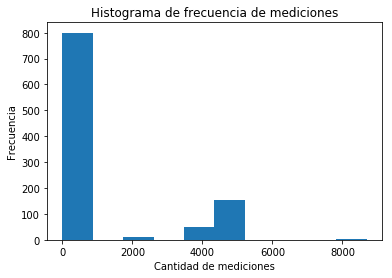

In [74]:
# Si una barra se programa una vez, se programa siempre?
plt.hist(analisis['costo_prog'])
plt.title('Histograma de frecuencia de mediciones')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de mediciones')


A grandes rasgos, se puede ver que la seleccion de qué barras programar no es aleatoria, sino que consistente (casi siempre las mismas)

Luego de una exploración básica, se identificaron algunos datos que podrían ser relevantes:
 - La base de costos programados contiene duplicados
 - La base no cuenta con un año completo de datos, esto es relevante para la extrapolación de las conclusions obtenidas durante el análisis
 - A priori, no se identifican valores nulos
 - Solo un 17.7% de las barras tiene programación

### Análisis de costo real y programado vs hora

Text(0, 0.5, 'Costo (US)')

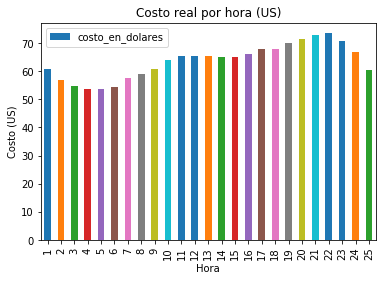

In [75]:
# Entendiendo el costo real
analisis = costo_marginal.pivot_table(values = 'costo_en_dolares', index='hora', aggfunc = np.mean).reset_index()
analisis.head()
ax = analisis.plot(x='hora', y='costo_en_dolares', kind='bar', title='Costo real por hora (US)')
ax.set_xlabel('Hora')
ax.set_ylabel('Costo (US)')
# 25 horas es raro, exploración necesaria para identificar causa del problema (si es que es un problema)

Al explorar la relación entre costo y hora, se observa que existen patrones detrás. Una tesis a probar, podría ser la relación del costo por hora con el uso de electricidad, ya que cuando la mayoría duerme (menor uso), el costo es menor y en la horas de oscuridad (mayor uso), el costo es mayor.


Text(0, 0.5, 'Costo (US)')

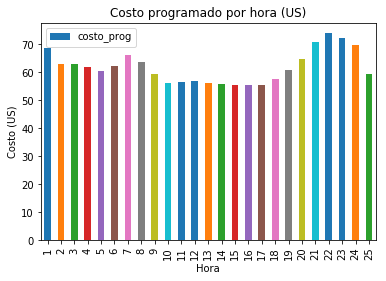

In [76]:
analisis = costo_marginal.pivot_table(values = 'costo_prog', index='hora', aggfunc = np.mean).reset_index()
ax = analisis.plot(x='hora', y='costo_prog', kind='bar', title='Costo programado por hora (US)')
ax.set_xlabel('Hora')
ax.set_ylabel('Costo (US)')

Text(0, 0.5, 'Costo (US)')

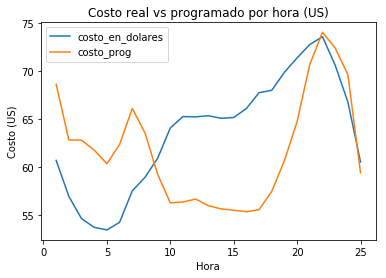

In [77]:
analisis = costo_marginal.pivot_table(values = ['costo_prog', 'costo_en_dolares'], index='hora', aggfunc = np.mean).reset_index()

ax = analisis.plot(x='hora', y=['costo_en_dolares','costo_prog'], kind='line', title='Costo real vs programado por hora (US)')
ax.set_xlabel('Hora')
ax.set_ylabel('Costo (US)')

Se observa que entre las 21 y 24 hrs la programación es bastante más exacta que durante el resto del día, esto da indicios sobre que esta podría ser una variable útil para predecir desviación de precios.

# Pregunta 2

In [115]:
# Generación de variables solicitadas
costo_marginal['desviacion'] = costo_marginal['costo_en_dolares'] - costo_marginal['costo_prog']
costo_marginal['desviacion_pct'] = ((costo_marginal['costo_en_dolares'] - costo_marginal['costo_prog'])/costo_marginal['costo_prog'])*100
costo_marginal['desviacion_cat'] = costo_marginal['desviacion_pct'].apply(lambda x: 1 if np.abs(x) > 15 else 0) 

# Variables potencialmente útiles para el análisis
costo_marginal['fecha'] = pd.to_datetime(costo_marginal['fecha'])
costo_marginal['day_of_week'] = costo_marginal['fecha'].dt.day_name()
costo_marginal['week'] = costo_marginal['fecha'].dt.week

In [79]:
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo_prog,desviacion,desviacion_pct,desviacion_cat,day_of_week,week
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV,NaN,NaN,NaN,NaN,0,Saturday,14
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV,NaN,NaN,NaN,NaN,0,Saturday,14
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1,NaN,NaN,NaN,NaN,0,Saturday,14
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1,NaN,NaN,NaN,NaN,0,Saturday,14
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1,NaN,NaN,NaN,NaN,0,Saturday,14


Text(0, 0.5, 'Promedio de desviacion_cat')

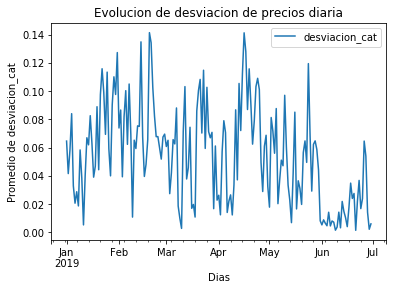

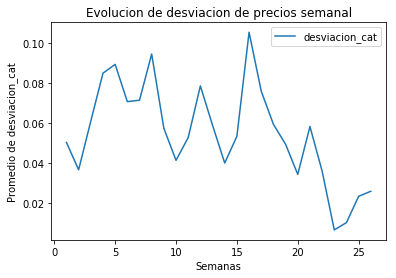

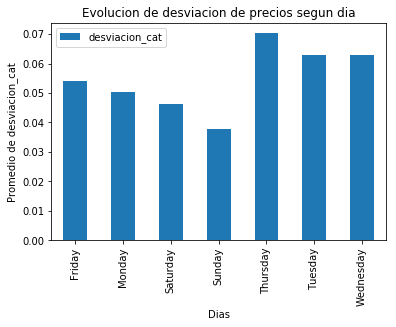

In [80]:
# graficar variable desviacion_cat a traves del tiempo
analisis_date = costo_marginal.pivot_table(values = ['desviacion_cat'], index='fecha', aggfunc = np.mean).reset_index()
ax_date = analisis_date.plot(x='fecha', y=['desviacion_cat'], kind='line', title='Evolucion de desviacion de precios diaria')
ax_date.set_xlabel('Dias')
ax_date.set_ylabel('Promedio de desviacion_cat')

# A nivel semanal podrian identificarse otro tipo de patrones
analisis_week = costo_marginal.pivot_table(values = ['desviacion_cat'], index='week', aggfunc = np.mean).reset_index()
ax_week = analisis_week.plot(x='week', y=['desviacion_cat'], kind='line', title='Evolucion de desviacion de precios semanal')
ax_week.set_xlabel('Semanas')
ax_week.set_ylabel('Promedio de desviacion_cat')


analisis_day = costo_marginal.pivot_table(values = ['desviacion_cat'], index='day_of_week', aggfunc = np.mean).reset_index()
ax_day = analisis_day.plot(x='day_of_week', y=['desviacion_cat'], kind='bar', title='Evolucion de desviacion de precios segun dia')
ax_day.set_xlabel('Dias')
ax_day.set_ylabel('Promedio de desviacion_cat')

Como se puede ver en los gráficos anteriores, el comportamiento de la desviación (tal como esta construida) no es estable durante el tiempo. Al analizar a nivel semanal, se observa una leve tendencia a la baja, pero bastante volatil (varios peaks). Una posible causa para esto podría estar relacionada con las acciones que se toman cuando la desviación aumenta (desviación aumenta, se corrige algo, entonces desviación baja), sin embargo, es solo una teoría y debe ser corroborada.

Con respecto a los días de la semana, se observa que la desviación no es la misma en cada uno, donde martes, miercoles y jueves muestran una mayor desviación que el resto de los días.

# Pregunta 3

In [81]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    base_plot = costo_marginal[(costo_marginal['barra_mnemotecnico'] == codigo_barra) & (costo_marginal['fecha'] >= fecha_inicial) & (costo_marginal['fecha'] <= fecha_final)]
    analisis = base_plot.pivot_table(values = ['costo_en_dolares','costo_prog'], index='fecha', aggfunc = np.mean).reset_index()
    ax = analisis.plot(x='fecha', y=['costo_en_dolares','costo_prog'], kind='line', title='Costo real y programado diario')
    ax.set_xlabel('Dias')
    ax.set_ylabel('Costo (US)')
    # barra debe tener costo_prog (con mas tiempo se puede generar una excepcion que avise que la barra seleccionada no
    # tiene costo programado)


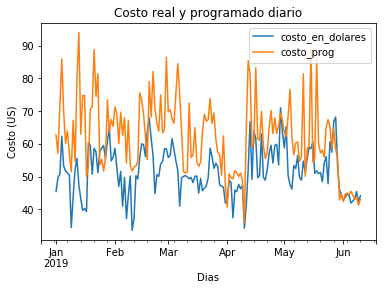

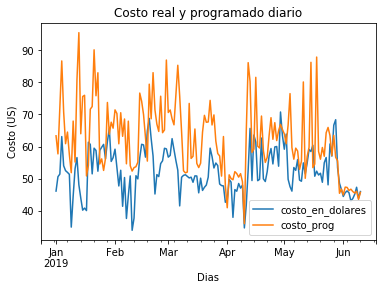

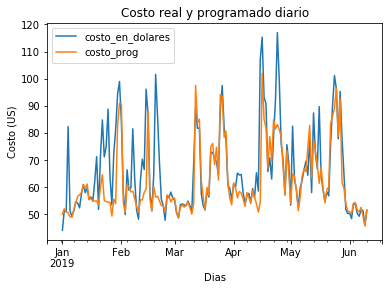

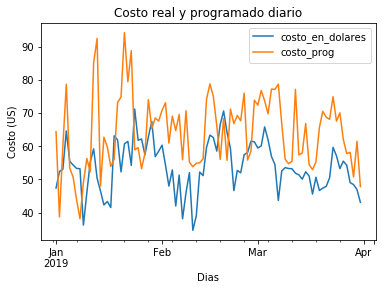

In [82]:
time_plot_costo_barra('BA12T025SE075T025', '2019-01-01', '2019-06-10')
time_plot_costo_barra('BA54T005SE289T005', '2019-01-01', '2019-06-10')
time_plot_costo_barra('BA01R002SE048R002', '2019-01-01', '2019-06-10')
time_plot_costo_barra('BA74T005SE278T005', '2019-01-01', '2019-06-10')


Del analisis de 4 barras (con mas tiempo se pueden analizar más barras y sacar conclusiones más extrapolables) se puede ver que el comportamiento del costo real no es el mismo en todas. Mientras que en algunas es relativamente más estable, en otras presenta peaks más marcados. Esta es, probablemente, una de las causas por las que el costo programado presenta mayor volatilidad (más peaks) que el costo real en 3 de las 4 barras.

Lo ideal sería entender si existe una razón detrás de esta volatilidad (probablemente la hay) y ver la forma de traspasar esa causa a una variable. Por ejemplo, si una causa de esta volatilidad fuera la cercanía a centros urbanos densos (solo por decir algo), una variable que capture esta información podría ayudar a un potencial modelo a separar estos dos tipos de barras y realizar una mejor predicción para cada una.

In [83]:
# Identificación de barras con costo real 0 y eliminación de la base
analisis = costo_marginal.pivot_table(values = ['costo_en_dolares'], index='barra_mnemotecnico', aggfunc = np.sum).reset_index()
barras_cto_real = analisis.sort_values(by=['costo_en_dolares'])

barras_cto_real_0 = barras_cto_real[barras_cto_real['costo_en_dolares'] == 0] # seleccionar barras
barras_0 = barras_cto_real_0['barra_mnemotecnico'] # barras con cmg_real = 0

# Eliminación de la base
costo_marginal = costo_marginal[~costo_marginal['barra_mnemotecnico'].isin(barras_0)]

# Pregunta 4

In [84]:
base_path = Path("base_para_prediccion.csv")
data_pred = pd.read_csv(base_path)

### Exploración básica de la base

In [85]:
data_pred.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [86]:
data_pred.describe()

,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
count,112779.000000,0.0,0.0,34184.000000,41818.000000,61863.000000,112779.000000,112779.000000,112779.000000,1.127790e+05,112779.000000,1.127790e+05,112779.000000
mean,12.502993,NaN,NaN,38.120053,3.764987,40.583146,61.170058,62.215400,-1.045338,inf,2.331844,6.357056e+07,128.719565
std,6.924090,NaN,NaN,69.838109,12.904388,101.083396,25.414147,25.307759,24.711575,NaN,1.304096,3.948683e+08,167.948649
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,-1.713131,-562.470000,-3.403970e+03,1.000000,-9.821095e+09,2.989800
25%,7.000000,NaN,NaN,0.849787,0.000000,0.000000,49.130000,49.906745,-3.790000,-7.070000e+00,1.000000,7.464800e+05,18.420000
50%,13.000000,NaN,NaN,9.600000,0.000000,0.000000,54.610000,55.420601,-0.310000,-5.800000e-01,2.000000,4.507282e+06,51.850000
75%,19.000000,NaN,NaN,40.000000,1.571022,15.960000,63.500000,64.701951,1.670000,2.920000e+00,3.000000,1.332345e+07,184.685500
max,25.000000,NaN,NaN,472.000000,86.050000,570.600800,240.360000,610.600000,175.020000,inf,6.000000,1.004240e+10,597.782800


In [87]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112779 entries, 0 to 112778
Data columns (total 15 columns):
nemotecnico_se              112779 non-null object
fecha                       112779 non-null object
hora                        112779 non-null int64
gen_eolica_total_mwh        0 non-null float64
gen_geotermica_total_mwh    0 non-null float64
gen_hidraulica_total_mwh    34184 non-null float64
gen_solar_total_mwh         41818 non-null float64
gen_termica_total_mwh       61863 non-null float64
cmg_real                    112779 non-null float64
cmg_prog                    112779 non-null float64
cmg_desv                    112779 non-null float64
cmg_desv_pct                112779 non-null float64
n_barras                    112779 non-null int64
demanda_mwh                 112779 non-null int64
cap_inst_mw                 112779 non-null float64
dtypes: float64(10), int64(3), object(2)
memory usage: 12.9+ MB


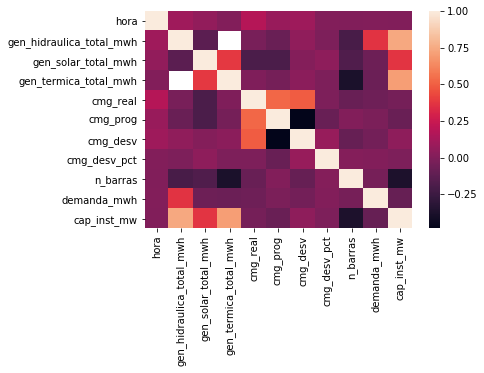

In [88]:
data_pred_wo_null = data_pred.drop(['gen_eolica_total_mwh','gen_geotermica_total_mwh'], axis=1) # solo para graficar
pearson = data_pred_wo_null.corr(method='pearson')
sns.heatmap(pearson)

C:\Users\Marco\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Marco\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


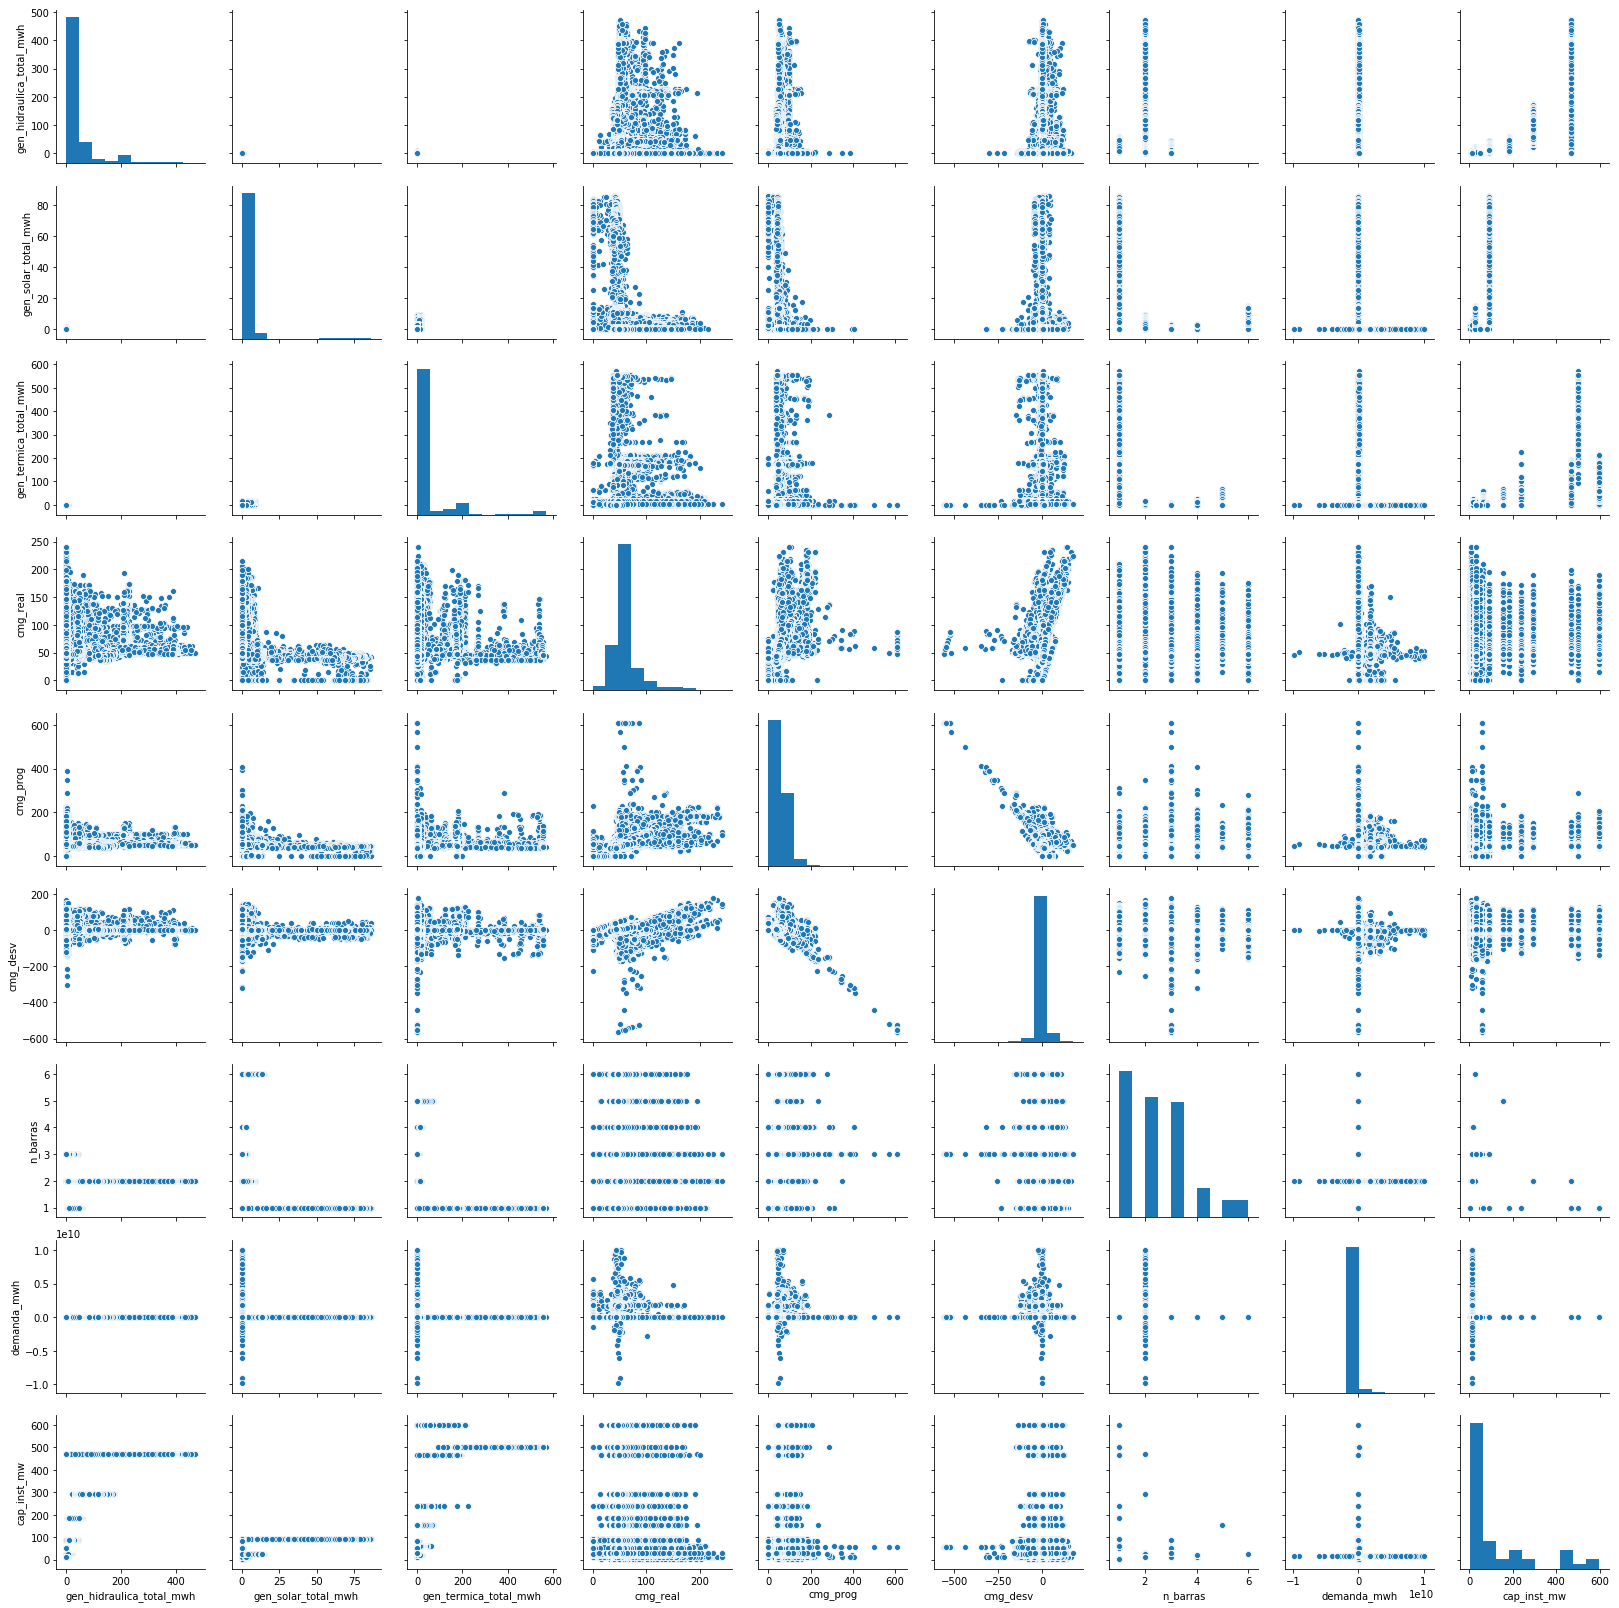

In [89]:
data_pred_graph = data_pred.drop(['hora','gen_eolica_total_mwh','gen_geotermica_total_mwh','cmg_desv_pct'], axis=1) # solo para graficar
sns.pairplot(data_pred_graph)

Explorando la base de forma bien básica, es posible notar varias cosas:

 - Dejando fuera la fecha y el identificador de la subestación, las variables son todas numericas. Dentro de esas, las horas, el número de barras y la demandas son enteros, mientras que los demas contienen decimales.
 - La variable cmg_desv_pct se mueve entre -inf y +inf, lo cual podría ser un problema a futuro.
 - Las variables gen_eolica_total_mwh y gen_geotermica_total_mwh no tienen datos. Una hipótesis para esto podria ser que las subestaciones no generan ese tipo de energía.
 - Las variables gen_hidraulica_total_mwh, gen_solar_total_mwh y gen_termica_total_mwh tienen datos perdidos. Esto es esperable, dado que pueden haber subestaciones que no generen energía a toda hora.
 - En términos generales, las variables no están muy correlacionadas entre sí. La excepción a esto se da entre el costo real y la desviación (correlación positiva), y entre el costo programado y la desviación (correlación negativa). Esto no está acorde a mis expectativas, ya que hubiera esperado ver una correlación positiva entre el costo real y el programado. Esto muestra que existen oportunidades para mejorar la programación de los costos marginales.
 - Con respecto a la distribución de las variables, es posible ver que la distribución de varias está muy centrada en un solo valor. Esta falta de varianza hará que sea complicado para un modelo encontrar valor en la variable. Un subcaso de este tipo son las variables donde este peak está cargado a la izquierda, en este caso, una estrategia útil para generar una distribución  más similar a una normal es aplicar logaritmo. Esto aumentará la varianza en la variable lo que podría ser potencialmente útil para el modelo. Un ejemplo de esto se puede observar a continuación. (Por tiempo, esta transformación no fue aplicada a las variables para la predicción, pero es esperable que mejore la performance del modelo).

Text(0, 0.5, 'Count')

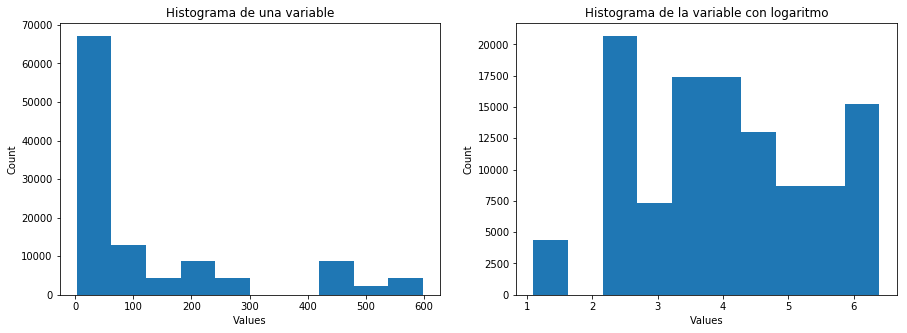

In [116]:
# Ejemplo de distribución de la variable antes y después de aplicar logaritmo
cap_inst = data_pred['cap_inst_mw']

cap_inst_log = []
cap_inst_log = [np.log(x + 0.0001) for x in cap_inst]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(cap_inst)
plt.title('Histograma de una variable')
plt.xlabel('Values')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(cap_inst_log)
plt.title('Histograma de la variable con logaritmo')
plt.xlabel('Values')
plt.ylabel('Count')

In [91]:
# Generación de variables usando fecha
data_pred['fecha'] = pd.to_datetime(data_pred['fecha'])
data_pred['year'] = data_pred['fecha'].dt.year
data_pred['month'] = data_pred['fecha'].dt.month
data_pred['week'] = data_pred['fecha'].dt.week
data_pred['day_of_month'] = data_pred['fecha'].dt.day
data_pred['day_of_week'] = data_pred['fecha'].dt.weekday
data_pred['weekend'] = data_pred['day_of_week'].apply(lambda x: 1 if x in [5,6] else 0) 


In [92]:
def time_plot_subest(subest, variable, fechas):
    an = pd.DataFrame()
    for fecha in fechas:
        base_plot = data_pred[(data_pred['nemotecnico_se'] == subest) & (data_pred['fecha'] == fecha)]
        analisis = base_plot.pivot_table(values = [variable], index='hora', aggfunc = np.mean)#.reset_index()
        an = pd.concat((an, analisis), axis=1)
    an = an.reset_index()
    ax = an.plot(x='hora', y=[variable], kind='line', title='Perfil diario para {}'.format(fecha), legend=None, figsize=(5,3))
    ax.set_xlabel('Hora')
    ax.set_ylabel(variable)

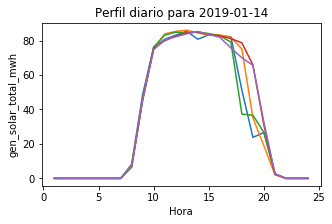

In [93]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14'] 
time_plot_subest('SE005T002', 'gen_solar_total_mwh', fechas )

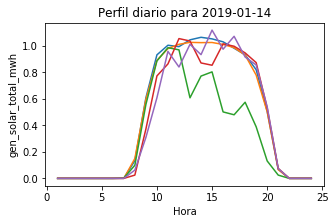

In [94]:
fechas = ['2019-01-10', '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14'] 
time_plot_subest('SE127T005', 'gen_solar_total_mwh', fechas )

Sobre las estaciones recién graficadas, es posible notar algunas características:
 - Solamente generan energía en los periodos de luz, lo cual hace perfecto sentido ya que estamos graficando la generación de energía solar.
 - La diferencia en la cantidad de energía generada es grande. Hay varias potenciales causas para este efecto. Primero, que la segunda subestación se encuentre ubicada en una zona con menor acceso a luz solar durante esos días. Segundo, que exista algún tipo de error en la medida y que no se estén usando las mismas unidades de medición. 
 - A diferencia de la estación SE005T002, la estación SE127T005 no genera una cantidad estable de energía durante las horas de luz. Las causas potenciales de esto son similares a las del punto anterior.
 
Algunos análisis que se pueden realizar para testear las hipótesis descritas anteriormente son los siguientes:
 - Analizar la base de datos de clima, para ver si la subestación en cuestion estuvo menos expuesta a luz solar.
 - Analizar los niveles de energía generados durante todo el periodo disponible. La idea es ver si esos niveles tan bajos de energía ocurrieron solo en algunos o durante todo el periodo. 
 - Analizar otros tipos de energía generados por la subestación. Podría ser que la subestación en cuestión no genere tanta energía solar, pero si de otro tipo.
 
* Estos analisis no fueron llevados a cabo por tiempo.


# Pregunta 5

In [95]:
# Variable target
data_pred['cmg_desv_bin'] = data_pred['cmg_desv_pct'].apply(lambda x: 1 if np.abs(x) > 15 else 0)

# Eliminar variable usada para calcular (por potencial alta correlación y valores inf)
data_pred = data_pred.drop(['cmg_desv_pct'], axis=1)

# Transformar NaN en 0s para la suma
data_pred['gen_eolica_total_mwh'] = data_pred['gen_eolica_total_mwh'].fillna(0)
data_pred['gen_geotermica_total_mwh'] = data_pred['gen_geotermica_total_mwh'].fillna(0)
data_pred['gen_hidraulica_total_mwh'] = data_pred['gen_hidraulica_total_mwh'].fillna(0)
data_pred['gen_solar_total_mwh'] = data_pred['gen_solar_total_mwh'].fillna(0)
data_pred['gen_termica_total_mwh'] = data_pred['gen_termica_total_mwh'].fillna(0)
data_pred['gen_total'] = data_pred['gen_eolica_total_mwh'] + data_pred['gen_geotermica_total_mwh'] + data_pred['gen_hidraulica_total_mwh'] + data_pred['gen_solar_total_mwh'] + data_pred['gen_termica_total_mwh']

In [96]:
# Adecuando la variable target
data_pred['cmg_desv_bin_t+1'] = (data_pred['cmg_desv_bin'].shift(-1) > 0).astype(int)

# Distribución variable target
data_pred['cmg_desv_bin_t+1'].value_counts()

0    84288
1    28491
Name: cmg_desv_bin_t+1, dtype: int64

Siempre es útil entender la distribución de la variable target. En este caso, los casos positivos son notoriamente menos que los negativos, lo cual podría ocasionar problemas. (Un modelo que prediga siempre negativo, tendrá una  accuracy alta). Para eso, usaré como medida de evaluación el score f1, el cual mezcla precision y recall, permitiendo mitigar esos problemas.

In [97]:
# Variable para ver si hubo una desviación importante en la hora anterior y la anterior a esta (Probablemente si hubo un
# error de predicción previo, habrá otro)
data_pred['cmg_desv_bin_t-1'] = (data_pred['cmg_desv_bin'].shift(1) > 0).astype(int)
data_pred['cmg_desv_bin_t-2'] = (data_pred['cmg_desv_bin'].shift(2) > 0).astype(int)

In [98]:
# Generar base de entrenamiento y test (En un caso ideal, sería ideal tener además una base de validación, pero en este
# caso no es necesario)

x = data_pred.loc[:, data_pred.columns != 'cmg_desv_bin_t+1']
x = x.drop(['fecha','nemotecnico_se'], axis=1)
y = data_pred.loc[:, data_pred.columns == 'cmg_desv_bin_t+1']
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [99]:
# Entrenar modelo
# Siempre es útil comenzar con un modelo simple
model = LogisticRegression()
model.fit(x_tr,y_tr)

pred = model.predict(x_test)

# Evaluar resultados
acc = accuracy_score(y_test, pred)
conf_mat = confusion_matrix(y_test, pred)
f1 = f1_score(y_test, pred)
print(conf_mat)
print('Accuracy: {} | F1 score: {}'.format(acc,f1))

C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[16777    24]
 [ 5753     2]]
Accuracy: 0.7438818939528286 | F1 score: 0.0006919218128351496


Dado lo analizado anteriormente con respecto a la distribución de la variable target, la principal variable a utilizar para evaluar el modelo será el score F1. Este score se calcula utilizando precision y recall.

Si bien el nivel de accuracy podría parecer alto, al analizar la matriz de confusión y el score f1, es posible ver que lo único que hizo el modelo fue predecir 0 para la mayoría de los casos. Hay varias estrategias a seguir para resolver este problema:
 - Sub-muestreo o sobre-muestreo: En este caso se eliminan datos de la variable con más ejemplos o se agregan datos de la variable con menos ejemplos (Algunos algoritmos útiles para eso son SMOTE y SMOGN). Existe un trade-off entre sub y sobre muestreo, mientras que uno elimina información, el otro agrega ruido.
 - Utilizar un modelo más complejo, el cual potencialmente sería capaz de manejar este problema.
 - Modificar el valor asociaco al error en la predicción de cada variable para forzar al modelo a enfocarse en resolver bien los casos con menos ejemplos
 
Por tiempo, solamente la segunda estrategia se probará, usando un ensemble.

In [100]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(x_tr,y_tr)

pred = model.predict(x_test)

# Evaluar resultados
acc = accuracy_score(y_test, pred)
conf_mat = confusion_matrix(y_test, pred)
f1 = f1_score(y_test, pred)
print(conf_mat)
print('Accuracy: {} | F1 score: {}'.format(acc,f1))

C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[15567  1234]
 [ 1587  4168]]
Accuracy: 0.8749334988473133 | F1 score: 0.7471542529353771


En este caso, no solamente una mejor accuracy es alcanzada, sino que el F1 score es inmensamente mayor. El mismo efecto puede observarse en la matriz de confusión.

Text(0.5, 1.0, 'Variables más importantes')

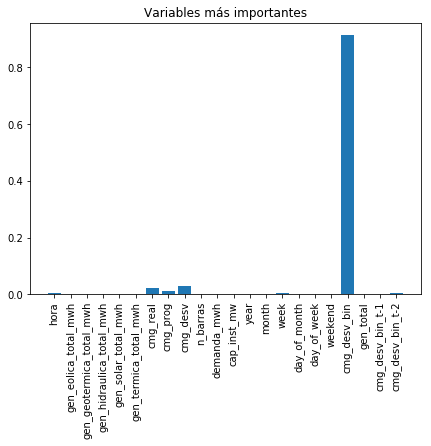

In [101]:
plt.figure(figsize=(7,5))
plt.bar(x.columns, model.feature_importances_);
plt.xticks(rotation=90);
plt.title('Variables más importantes')

Para el modelo, la variable más importante es la desviación binaria de la hora actual. El razonamiento detrás de esto es que los errores no ocurren de forma aleatoria, sino que si hay un error de predicción en t, la probabilidad de que haya un error de predicción en t+1 aumenta.

# Pregunta 6

Si voy a recibir datos actualizados cada 12 horas, quiere decir que ya no podré predecir la desviación en la hora siguiente (excepto para la primera hora). Hay distintas estrategias que se pueden seguir en este escenario:

 - Predecir solamente la primera hora de las 12. Esto presenta varios problemas, dentro de los cuales están que se perderá información de otras horas, dado que solo predeciré dos horas del día.
 - Predecir las 12 horas siguientes con distintos modelos. Es esperable que la calidad del modelo baje a medida que la diferencia en las horas aumenta (Es potencialmente más dificil predecir lo que ocurrirá en 10 horas que lo que ocurrirá en la siguiente hora)
 - Predecir si habrá alguna desviación en las próximas 12 horas. Una desventaja de esto es que podría alejarse mucho del objetivo del proyecto.
 - Predecir la desviación 12 horas adelante (Usando t0 predigo t12, usando t1 predigo t13, etc.). Una desventaja es que con esta opción no estoy usando toda la información disponible (Para predecir t12, t11 es potencialmente útil, pero no la estoy usando). Sin embargo, una ventaja esta relacionada con su simpleza, por lo que dado el tiempo y lo comentado en la sección de motivación, esta será la solución implementada. 
 
Se asume que, pese a que los datos se entregaran cada 12 horas, el nivel de granularidad de estos seguirá siendo horaria.

In [102]:
# Eliminar variable target previa
data_pred = data_pred.drop(['cmg_desv_bin_t+1'], axis=1)

In [103]:
# Adecuando la variable target
data_pred['cmg_desv_bin_t+12'] = (data_pred['cmg_desv_bin'].shift(-12) > 0).astype(int)


In [104]:
# Generar base de entrenamiento y test (En un caso ideal, sería ideal tener además una base de validación, pero en este
# caso no es necesario)

x = data_pred.loc[:, data_pred.columns != 'cmg_desv_bin_t+12']
x = x.drop(['fecha','nemotecnico_se'], axis=1)
y = data_pred.loc[:, data_pred.columns == 'cmg_desv_bin_t+12']
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [105]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(x_tr,y_tr)

pred = model.predict(x_test)

# Evaluar resultados
acc = accuracy_score(y_test, pred)
conf_mat = confusion_matrix(y_test, pred)
f1 = f1_score(y_test, pred)
print(conf_mat)
print('Accuracy: {} | F1 score: {}'.format(acc,f1))

C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[16279   609]
 [ 4510  1158]]
Accuracy: 0.7730537329313708 | F1 score: 0.31149966375252186


Acorde a las expectativas, la performance del modelo cae considerablemente. Esto hace sentido, ya que la tarea de predecir 12 horas hacia adelante es bastante más compleja que una hora hacia adelante.

# Pregunta 7

In [106]:
clima_path = Path("datos_clima.csv")
data_clima = pd.read_csv(clima_path)

### Exploración basica de base de clima

In [107]:
data_clima.head()

,fecha,subestacion,lat,lon,ALLSKY_SFC_SW_DWN,KT,PRECTOT,RH2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,TQV,TS,WS10M,WS10M_MAX,WS10M_MIN,WS50M,WS50M_MAX,WS50M_MIN
0,2019-05-06 00:00:00 UTC,SE019T002,-28.470641,-71.252694,2.0,0.31,0.00,74.66,16.39,11.94,19.01,13.93,1.78,16.62,4.14,4.93,2.81,5.01,6.23,3.50
1,2019-05-21 00:00:00 UTC,SE005T003,-42.626987,-73.805673,2.0,0.54,0.01,92.82,5.55,4.45,9.39,3.32,0.77,6.50,2.64,2.94,2.04,4.20,4.94,3.55
2,2019-02-28 00:00:00 UTC,SE005T003,-42.626987,-73.805673,2.0,0.21,2.35,88.87,12.25,10.45,15.64,9.61,2.34,12.44,2.62,3.77,1.78,4.16,5.68,2.85
3,2019-01-08 00:00:00 UTC,SE004T002,-39.549899,-72.912208,2.0,0.16,5.96,92.22,9.52,8.30,10.88,7.90,1.62,10.17,2.70,4.02,1.67,4.96,6.87,2.97
4,2019-05-07 00:00:00 UTC,SE003T011,-35.685919,-71.377335,2.0,0.37,0.00,44.02,13.57,1.49,20.38,9.57,1.05,11.34,1.69,3.58,0.65,2.25,4.42,0.96


In [108]:
data_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5249 entries, 0 to 5248
Data columns (total 20 columns):
fecha                5249 non-null object
subestacion          5249 non-null object
lat                  5249 non-null float64
lon                  5249 non-null float64
ALLSKY_SFC_SW_DWN    5249 non-null float64
KT                   5249 non-null float64
PRECTOT              5249 non-null float64
RH2M                 5249 non-null float64
T2M                  5249 non-null float64
T2MDEW               5249 non-null float64
T2M_MAX              5249 non-null float64
T2M_MIN              5249 non-null float64
TQV                  5249 non-null float64
TS                   5249 non-null float64
WS10M                5249 non-null float64
WS10M_MAX            5249 non-null float64
WS10M_MIN            5249 non-null float64
WS50M                5249 non-null float64
WS50M_MAX            5249 non-null float64
WS50M_MIN            5249 non-null float64
dtypes: float64(18), object(2)
memo

In [109]:
data_clima.describe()

,lat,lon,ALLSKY_SFC_SW_DWN,KT,PRECTOT,RH2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,TQV,TS,WS10M,WS10M_MAX,WS10M_MIN,WS50M,WS50M_MAX,WS50M_MIN
count,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000
mean,-31.106976,-71.003621,3.370888,-1.460951,0.545866,49.509156,15.999503,4.142827,22.581949,10.957662,1.253637,16.649120,2.742547,5.024104,0.907925,3.272854,5.350478,1.250625
std,5.778688,0.906132,46.006182,45.718061,2.611628,20.109425,5.117600,6.586304,6.114147,4.668668,0.654316,6.336076,0.902433,1.507599,0.822141,1.235942,1.572277,1.223059
min,-42.626987,-73.805673,-999.000000,-999.000000,0.000000,3.340000,-6.870000,-31.580000,-2.060000,-11.430000,0.070000,-9.040000,0.790000,1.070000,0.010000,1.180000,2.010000,0.010000
25%,-34.867935,-71.252694,3.480000,0.560000,0.000000,33.470000,12.820000,-0.200000,19.360000,8.140000,0.800000,12.350000,2.170000,3.960000,0.380000,2.550000,4.330000,0.470000
50%,-33.267621,-70.730832,5.590000,0.700000,0.000000,48.060000,17.100000,5.000000,23.750000,11.830000,1.140000,17.480000,2.620000,5.050000,0.700000,2.940000,5.090000,0.870000
75%,-27.001930,-70.419211,7.660000,0.750000,0.050000,63.620000,19.690000,8.990000,26.570000,14.490000,1.560000,21.780000,3.090000,6.010000,1.120000,3.520000,5.970000,1.490000
max,-18.467444,-69.774461,10.040000,0.820000,65.080000,99.070000,28.880000,16.960000,40.860000,19.650000,4.460000,28.770000,9.050000,13.310000,8.170000,11.450000,16.630000,10.540000


In [110]:
data_clima['fecha'] = pd.to_datetime(data_clima['fecha'])
data_pred_clima = data_pred.merge(data_clima, left_on=['nemotecnico_se','fecha'], right_on = ['subestacion','fecha'], how='left')

Un factor importante a considerar es que los datos a nivel de clima están a nivel de día, mientras que los datos de la base de predicción están a nivel de hora. Dado esto, los valores de clima de cada día se agregaran a la base de predicción repitiendo los datos para cada hora. En otras palabras, todas las horas de un día, tendrán los mismos datos de clima.

In [111]:
data_pred_clima.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112779 entries, 0 to 112778
Data columns (total 44 columns):
nemotecnico_se              112779 non-null object
fecha                       112779 non-null datetime64[ns]
hora                        112779 non-null int64
gen_eolica_total_mwh        112779 non-null float64
gen_geotermica_total_mwh    112779 non-null float64
gen_hidraulica_total_mwh    112779 non-null float64
gen_solar_total_mwh         112779 non-null float64
gen_termica_total_mwh       112779 non-null float64
cmg_real                    112779 non-null float64
cmg_prog                    112779 non-null float64
cmg_desv                    112779 non-null float64
n_barras                    112779 non-null int64
demanda_mwh                 112779 non-null int64
cap_inst_mw                 112779 non-null float64
year                        112779 non-null int64
month                       112779 non-null int64
week                        112779 non-null int64
day_of_mont

In [112]:
# Adecuación variable target
data_pred_clima['cmg_desv_bin_t+12'] = (data_pred_clima['cmg_desv_bin'].shift(-12) > 0).astype(int)

x = data_pred_clima.loc[:, data_pred_clima.columns != 'cmg_desv_bin_t+12']
x = x.drop(['fecha','nemotecnico_se','subestacion'], axis=1)
y = data_pred_clima.loc[:, data_pred_clima.columns == 'cmg_desv_bin_t+12']
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [113]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(x_tr,y_tr)

pred = model.predict(x_test)

# Evaluar resultados
acc = accuracy_score(y_test, pred)
conf_mat = confusion_matrix(y_test, pred)
f1 = f1_score(y_test, pred)
print(conf_mat)
print('Accuracy: {} | F1 score: {}'.format(acc,f1))

C:\Users\Marco\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[16122   766]
 [ 4228  1440]]
Accuracy: 0.778595495655258 | F1 score: 0.3657607315214631


Un factor importante a considerar es el data leakage, el cual va a depender de lo periodicidad con que se pueda acceder a los datos de clima.  Si los datos de clima los entregan una vez al día, habrá un problema, ya que en la mitad de las predicciones no se tendrán los datos. 

En este caso, existen varias estrategias que se pueden seguir:
 - Identificar las variables de la base de clima que el modelo considera útiles, para intentar capturar solamente esas con una periodicidad mayor (en caso de que se tenga acceso a la extracción de esos datos o al menos comunicación con el equipo encargado).
 - Desarrollar dos modelos, uno con la base de clima y otro sin. De esta forma, si la data esta disponible, se puede aprovechar esto y utilizar el mejor modelo, mientras que si la base no esta disponible, se puede utilizar el modelo que no utiliza datos de clima, el cual tiene una peor performance, pero mejor que no tener nada.


Sobre la capacidad predictiva del modelo, se observa que esta mejora considerablemente en términos de F1.

Text(0.5, 1.0, 'Variables más importantes')

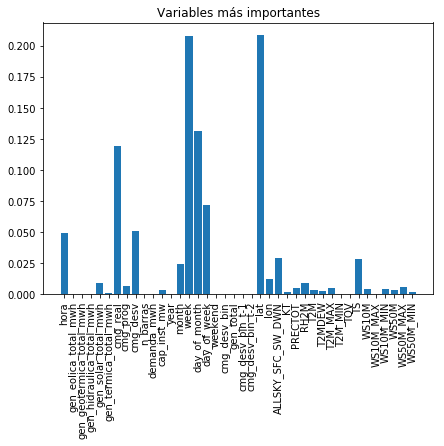

In [114]:
plt.figure(figsize=(7,5))
plt.bar(x.columns, model.feature_importances_);
plt.xticks(rotation=90);
plt.title('Variables más importantes')

Las variables más importantes son las siguientes:
 - Latitud -> Esto podría implicar que distintas ubicaciones tienen distintos comportamientos, lo cual hace perfecto sentido.
 - Week -> Esto también tiene sentido, entendiendo que distintas semanas implican distintas condiciones metereologicas (potencialmente distintas estaciones).
 - Day_of_month -> Esta es la tercera variable más relevante, a priori, no se me ocurre una causa (probablemente por mi limitado conocimiento del sistema eléctrico).

# Pregunta 8

Un modelo como el desarrollado en este desafío permitiría identificar en qué casos la desviación entre el costo real y el programado es mayor a lo esperado (implícito en el límite de +-15%), además de entender las variables que más ayudan a esta predicción. Estas variables, reflejan los principales puntos donde se debe poner énfasis para disminuir el gap entre el costo real y el predicho. 

Estas variables, permiten analizar de manera más profunda solamente algunos puntos del problema y no todos, haciendo de esta forma el trabajo más eficiente. Potencialmente, enfocarse en estas variables permitirá identificar las causas raíces del gap entre el costo real y el programado, pudiendo atacar estas causas directamente.


Con respecto a los casos de uso, existen varios que se me vienen a la mente:

*Idealmente, un caso de uso debería tener una métrica y un valor de la misma para considerar si el caso de uso funcionó o no. En este caso, dado el limitado tiempo para entender bien el contexto de negocio, solo se plantean ideas de casos de uso.

1. El primero sería utilizar las variables más relevantes en la predicción de desviaciones para entender la causa de raíz de las mismas y con eso desarrollar mecanismos para evitar que continuen. Este caso de uso podría abrirse en varios mini casos de uso, donde en cada uno se aplica un mecanismo y se mide si la desviación continúa o se reduce.
2. Tal como se discute en (1), el costo marginal de energía tiene efectos sobre los contratos de suministro de mediano y largo plazo. Por lo tanto, un segundo caso de uso es usar los insights provenientes de los resultados de este modelo para mejorar los modelos de predicción de costo marginal, generando mejores predicciones y con eso, disminuyendo las potenciales pérdidas fruto de contratos realizados con predicciones menos exactas. En términos más exactos, habría que medir las pérdidas en estos contratos por predicciones débiles (Esto podría tomar tiempo, pero podría implicar importantes efectos).
3. Relacionado con el punto anterior, un tercer caso de uso sería el mejorar el modelo de predicción de costo marginal usando los insights del modelo recién desarrollado. La métrica sería la misma que se esté usando para evaluar el modelo, además, se podría relacionar con una métrica del negocio (pérdida fruto de mala predicción?).


(1) https://scielo.conicyt.cl/pdf/rae/v32n2/0718-8870-rae-32-02-00003.pdf